# Nearest Neighbors Recommender 

In [1]:
# base
import pandas as pd
import matplotlib.pyplot as plt

# modelling
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

We learned that K-Nearest-Neighbors (KNN) models can be used to model data and make predictions.

👨🏻‍🏫 In this recap, we will use the "nearest neighbors" idea to create a basic music recommender system.

👉 Let's have a look at another model in `sklearn.neighbors`: [`NearestNeighbors`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html)

❓ Have a look at the documentation, and find out which typical method is missing from this model?

<details>
  <summary markdown='span'>Answer</summary>

  This model doesn't have a `.predict()` method.

</details>

❓ There's also something strange about the `.fit()` method. Do you see it?

<details>
  <summary markdown='span'>Answer</summary>

  The `.fit()` method can take `y`, but it's optional and not used anyway.

</details>

❓ From the docs, find out what this model does.

<details>
  <summary markdown='span'>Answer</summary>

  This model simply finds the nearest neighbors. Nothing more, nothing less. It doesn't classify, nor does it regress.

  This is an example of "unsupervised learning": models that don't try to predict a target (class or value). A model like this discovers patterns, structure, or relationships within the data on its own.

</details>

Let's put it into practice with song data from Spotify.

👉 Load the data and explore it.

In [2]:
url = 'https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv'
df = pd.read_csv(url)
df.head(2)

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783


🎯 Let's find songs that are "similar" to Queen's mythical *Another One Bites the Dust*.

In [3]:
queen_song = df.iloc[4295:4296] # Another One Bites the Dust - Queen
queen_song

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,Another One Bites The Dust - Live at Wembley '86,['Queen'],29,0.534,0.114,0.984,0,4,0.982,-5.058,0.297,115.991


## 1. Fit the model

👉 First, let's fit a KNN on the dataset.

We need to remove a couple of columns from the data first. Which ones? Remember, we want to find similar songs based on their characteristics, from any artist.

In [4]:
X = df.drop(columns=['name', 'artists'])
X.columns

Index(['popularity', 'danceability', 'valence', 'energy', 'explicit', 'key',
       'liveness', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

👉 Next, instantiate the NearestNeighbors model, and fit it. It's unsupervised, but still very similar to what you're used to.

In [5]:
neighbors_model = NearestNeighbors()
neighbors_model.fit(X)

NearestNeighbors()

❓ What do you think happens when we train the model?

<details>
  <summary markdown='span'>Answer</summary>

  Nothing much. It just **stores the data**.

  🤔 `NearestNeighbors` is a non-parametric model, meaning it does not learn weights or a predictive equation.

  The `.fit()` simply memorizes the dataset you give it. This stored dataset is what it will later search through to find nearest points.

  In essence this is also what `KNeighborsRegressor` and `KNeighborsClassifier` do: store the data to later find the nearest neighbors, and take the mean of their labels (regressor), or the most frequent of their labels (classifier).
  
  _Note_: Depending on the chosen algorithm, the models might do some extra calculations to speed up the retrieval of the nearest neighbors, but the principle remains the same.

</details>


## 2. Use the model to find similar songs

We can now pass our chosen song to the `NearestNeighbors` model.

👉 First find its closest neighbor.

In [6]:
X_new = queen_song.drop(columns=['artists', 'name'])
X_new

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,29,0.534,0.114,0.984,0,4,0.982,-5.058,0.297,115.991


In [7]:
neighbors_model.kneighbors(X_new, n_neighbors=1)

(array([[0.]]), array([[4295]]))

In [8]:
df.iloc[4295:4296]

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
4295,Another One Bites The Dust - Live at Wembley '86,['Queen'],29,0.534,0.114,0.984,0,4,0.982,-5.058,0.297,115.991


❓ Why does the model always return the actual song? Wouldn't it be easier if it just gave the neighbors, and not the point itself?

<details>
  <summary markdown='span'>Answer</summary>

  The model returns the original song as the closest match only because we're querying it with a song **that already exists in the dataset**. Naturally, the closest point to that song is the song itself, so it appears as its own nearest neighbor.

  In a real-world scenario, you would typically query the model with a **new, unseen song** — one that is not part of X. In that case, the nearest neighbor returned would be the most similar song **from the dataset**, not the exact input you provided.

</details>

In [9]:
neighbors_model.kneighbors(X_new, n_neighbors=2)

(array([[0.        , 2.55269431]]), array([[4295, 3488]]))

In [10]:
df.iloc[3488:3489]

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
3488,Confidence Man,['The Jeff Healey Band'],30,0.56,0.868,0.927,0,6,0.316,-5.682,0.0715,116.236


## 3. Making a playlist!

👉 Make a playlist with 10 songs based on Queen's *Another One Bites the Dust*, sorted by distance. Include the distance as a column.

In [11]:
ten_songs = neighbors_model.kneighbors(X_new, n_neighbors=11)
songs_idx = ten_songs[1][0,1:]
songs_distances = ten_songs[0][0,1:]

In [12]:
playlist = df.iloc[songs_idx].copy()
playlist['distance'] = songs_distances

In [13]:
playlist

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo,distance
3488,Confidence Man,['The Jeff Healey Band'],30,0.560,0.8680,0.927,0,6,0.3160,-5.682,0.0715,116.236,2.552694
2700,君のハートはマリンブルー,"['オメガトライブ', 'Kiyotaka Sugiyama']",29,0.602,0.6240,0.794,0,4,0.4130,-5.512,0.0271,113.612,2.561872
2507,Too Much Blood - Remastered,['The Rolling Stones'],30,0.592,0.4790,0.909,0,6,0.0571,-5.887,0.0512,116.439,2.635530
3586,LOVE IN THE FIRST DEGREE ~悪いあなた~ (Remastered 2...,['Wink'],29,0.784,0.7570,0.944,0,2,0.2340,-6.579,0.0505,116.058,2.723187
2794,Reaction to Action,['Foreigner'],30,0.631,0.4040,0.935,0,2,0.1510,-6.459,0.0564,115.687,2.810619
5179,On Silent Wings,['Tina Turner'],30,0.519,0.5180,0.581,0,2,0.0613,-6.900,0.0337,115.851,3.107319
3047,Millionaires Against Hunger,['Red Hot Chili Peppers'],29,0.815,0.5490,0.970,1,2,0.0348,-3.384,0.0834,117.264,3.260981
1704,Baba O'Riley - Live At Shepperton,['The Who'],27,0.304,0.4120,0.835,0,5,0.8570,-7.372,0.0662,114.621,3.530481
3648,Mary Jane - Remastered,['Megadeth'],30,0.429,0.3640,0.959,0,2,0.3420,-4.789,0.1200,113.361,3.536148
2668,Under The Gun,['KISS'],29,0.515,0.0833,0.967,0,4,0.5700,-5.127,0.1760,119.875,3.908477


## 4. Wait a minute...

👉 Run the cell below to have a look at the features' distributions

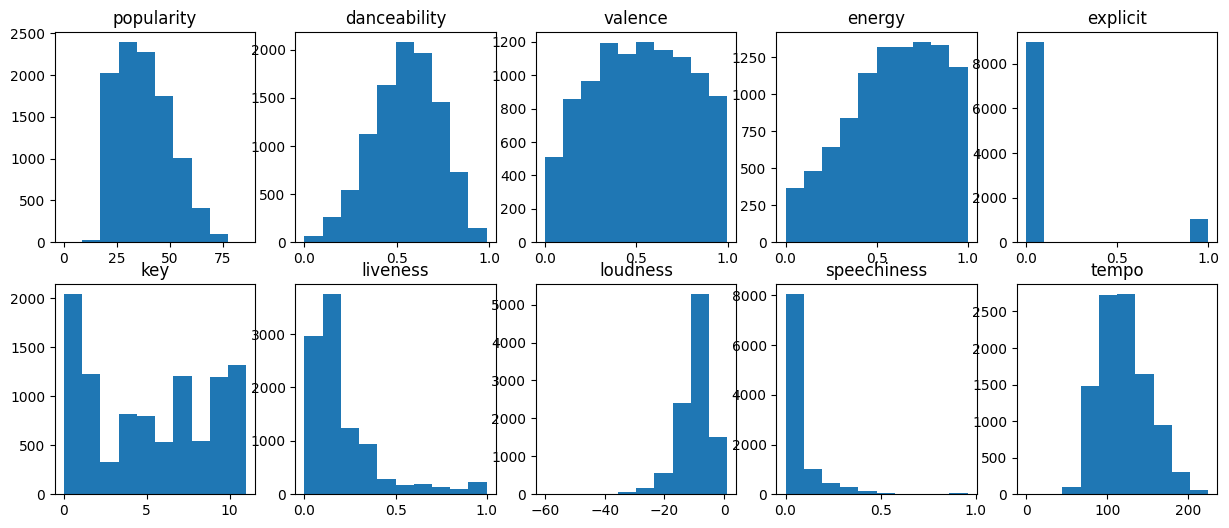

In [14]:
# Create subplots for all numerical features, split over two rows
fig, axes = plt.subplots(2, int((len(df.columns)-2)/2), figsize=(15,6))
for ax, column in zip(axes.flatten(), df.columns[2:]):  # Using .flatten to go from a 2 by 5 array to 1 by 10 to be able to iterate over it
    ax.hist(df[column])
    ax.set_title(column)

❓ What do you notice?

<details>
  <summary markdown='span'>Answer</summary>

  Some features are on a very different scale.

  When calculating the distance, these features will dominate the distance calculation.

  We need to scale the features first!

</details>

## 5. Do it the proper way

👉 Fit the model again, but with preprocessing. Which columns should you preprocess?

In [15]:
# define scaler
minmax_scaler = MinMaxScaler().set_output(transform='pandas')

In [16]:
X.head(2)

,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783


In [17]:
# most of the cols are already a frequency, or a boolean, so we scale the rest:
cols_to_scale = ['popularity', 'key', 'loudness', 'tempo']
X_to_scale = X[cols_to_scale]
X_scaled = minmax_scaler.fit_transform(X_to_scale)
X_scaled.head(2)

,popularity,key,loudness,tempo
0,0.255814,0.272727,0.774548,0.524307
1,0.290698,0.545455,0.807362,0.640639


In [18]:
X_preproc = pd.concat([X_scaled, X.drop(columns=cols_to_scale)], axis = 1)
X_preproc.head(2)

,popularity,key,loudness,tempo,danceability,valence,energy,explicit,liveness,speechiness
0,0.255814,0.272727,0.774548,0.524307,0.678,0.559,0.432,0,0.0727,0.0334
1,0.290698,0.545455,0.807362,0.640639,0.456,0.259,0.368,0,0.1560,0.0280


👉 Create a new `playlist_2`

In [19]:
X_new_2 = X_preproc.iloc[4295:4296]
X_new_2

,popularity,key,loudness,tempo,danceability,valence,energy,explicit,liveness,speechiness
4295,0.337209,0.363636,0.899612,0.516809,0.534,0.114,0.984,0,0.982,0.297


In [20]:
neighbors_model_preproc = NearestNeighbors()
neighbors_model_preproc.fit(X_preproc)

NearestNeighbors()

In [21]:
ten_songs_2 = neighbors_model_preproc.kneighbors(X_new_2, n_neighbors=11)
songs_idx_2 = ten_songs_2[1][0,1:]
songs_distances_2 = ten_songs_2[0][0,1:]
playlist_2 = df.iloc[songs_idx_2].copy()
playlist_2['distance'] = songs_distances_2

👉 Run the cell below to compare the two playlists.

In [22]:
pd.concat([
    playlist_2[['name', 'artists', 'distance']].reset_index(drop=True),
    playlist[['name', 'artists', 'distance']].reset_index(drop=True)
    ],
    axis=1)

,name,artists,distance,name,artists,distance
0,"Hi, Hi, Hi - Live / Remastered",['Wings'],0.355352,Confidence Man,['The Jeff Healey Band'],2.552694
1,Liar,['The Damned'],0.360270,君のハートはマリンブルー,"['オメガトライブ', 'Kiyotaka Sugiyama']",2.561872
2,Cheat Codes,['Nitro Fun'],0.363031,Too Much Blood - Remastered,['The Rolling Stones'],2.635530
3,"It Ain't Me, Babe - Live at LA Forum, Inglewoo...",['Bob Dylan'],0.376242,LOVE IN THE FIRST DEGREE ~悪いあなた~ (Remastered 2...,['Wink'],2.723187
4,A Light In The Black,['Rainbow'],0.389808,Reaction to Action,['Foreigner'],2.810619
5,Graveyard,['Butthole Surfers'],0.398940,On Silent Wings,['Tina Turner'],3.107319
6,YYZ - Live In Canada / 1980,['Rush'],0.400514,Millionaires Against Hunger,['Red Hot Chili Peppers'],3.260981
7,A Sort Of Homecoming - Live,['U2'],0.415709,Baba O'Riley - Live At Shepperton,['The Who'],3.530481
8,"Clock Strikes Ten - Live at Nippon Budokan, To...",['Cheap Trick'],0.422484,Mary Jane - Remastered,['Megadeth'],3.536148
9,You've Got Another Thing Coming - Live from th...,['Judas Priest'],0.423342,Under The Gun,['KISS'],3.908477


**See how different the two lists are? This is why scaling the data is so important when using distance-based models like nearest neighbors.**

> Remember that when you use `KNeighborsRegressor` or `KNeighborsClassifier`, they are doing the exact same thing: find the nearest neighbors, and use those neighbors' labels to calculate the prediction. If you don't scale the data properly, you will be using the labels of very different samples to make your prediction!